In [2]:
# prompt: Install PySpark

!pip install pyspark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.3-py2.py3-none-any.whl size=317840625 sha256=519bdf2a49f073181da0d9f8498e4302b2da9f6696622c17ad323d0fa02052e9
  Stored in directory: /root/.cache/pip/wheels/1b/3a/92/28b93e2fbfdbb07509ca4d6f50c5e407f48dce4ddbda69a4ab
Successfully built pyspark


In [3]:
# prompt: create spark session

from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Colab").getOrCreate()


In [4]:
# prompt: Load the CSV File into PySpark and Show the first 20 rows of the DataFrame

# Assuming the CSV file is named 'data.csv' and is in the current directory
df = spark.read.csv("/content/apple_stock.csv", header=True, inferSchema=True)

# Show the first 20 rows
df.show(20)


+----------+------------------+------------------+------------------+------------------+---------+------------------+
|      Date|              Open|              High|               Low|             Close|   Volume|         Adj Close|
+----------+------------------+------------------+------------------+------------------+---------+------------------+
|2010-01-04|        213.429998|        214.499996|212.38000099999996|        214.009998|123432400|         27.727039|
|2010-01-05|        214.599998|        215.589994|        213.249994|        214.379993|150476200|27.774976000000002|
|2010-01-06|        214.379993|            215.23|        210.750004|        210.969995|138040000|27.333178000000004|
|2010-01-07|            211.75|        212.000006|        209.050005|            210.58|119282800|          27.28265|
|2010-01-08|        210.299994|        212.000006|209.06000500000002|211.98000499999998|111902700|         27.464034|
|2010-01-11|212.79999700000002|        213.000002|      

In [5]:
# prompt: Print the schema of the DataFrame

df.printSchema()


root
 |-- Date: date (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: integer (nullable = true)
 |-- Adj Close: double (nullable = true)



In [6]:
# prompt: Get the number of rows in the DataFrame

row_count = df.count()
print("Number of rows:", row_count)


Number of rows: 1762


In [7]:
# prompt: Perform some basic descriptive statistics

# Calculate summary statistics for numerical columns
df.describe().show()

# Calculate the average closing price
from pyspark.sql.functions import avg, max, min

avg_closing_price = df.select(avg("Close")).collect()[0][0]
print("Average Closing Price:", avg_closing_price)

# Find the maximum and minimum closing prices
max_closing_price = df.select(max("Close")).collect()[0][0]
min_closing_price = df.select(min("Close")).collect()[0][0]
print("Maximum Closing Price:", max_closing_price)
print("Minimum Closing Price:", min_closing_price)

# You can perform other descriptive statistics as needed, like standard deviation, variance etc.
# Refer to PySpark documentation for available functions.


+-------+------------------+------------------+------------------+-----------------+-------------------+------------------+
|summary|              Open|              High|               Low|            Close|             Volume|         Adj Close|
+-------+------------------+------------------+------------------+-----------------+-------------------+------------------+
|  count|              1762|              1762|              1762|             1762|               1762|              1762|
|   mean| 313.0763111589103| 315.9112880164581| 309.8282405079457|312.9270656379113|9.422577587968218E7| 75.00174115607275|
| stddev|185.29946803981522|186.89817686485767|183.38391664371008|185.1471036170943|6.020518776592709E7| 28.57492972179906|
|    min|              90.0|         90.699997|         89.470001|        90.279999|           11475900|         24.881912|
|    max|        702.409988|        705.070023|        699.569977|       702.100021|          470249500|127.96609099999999|
+-------

In [8]:
# prompt: Select Key columns : ("Date", "Open", "Close", "Volume")

selected_df = df.select("Date", "Open", "Close", "Volume")
selected_df.show()


+----------+------------------+------------------+---------+
|      Date|              Open|             Close|   Volume|
+----------+------------------+------------------+---------+
|2010-01-04|        213.429998|        214.009998|123432400|
|2010-01-05|        214.599998|        214.379993|150476200|
|2010-01-06|        214.379993|        210.969995|138040000|
|2010-01-07|            211.75|            210.58|119282800|
|2010-01-08|        210.299994|211.98000499999998|111902700|
|2010-01-11|212.79999700000002|210.11000299999998|115557400|
|2010-01-12|209.18999499999998|        207.720001|148614900|
|2010-01-13|        207.870005|        210.650002|151473000|
|2010-01-14|210.11000299999998|            209.43|108223500|
|2010-01-15|210.92999500000002|            205.93|148516900|
|2010-01-19|        208.330002|        215.039995|182501900|
|2010-01-20|        214.910006|            211.73|153038200|
|2010-01-21|        212.079994|        208.069996|152038600|
|2010-01-22|206.78000600

In [9]:
# prompt: Calculate Daily Price Change.

from pyspark.sql.functions import col

# Calculate the daily price change (Close - Open)
daily_price_change_df = selected_df.withColumn("DailyPriceChange", col("Close") - col("Open"))

# Show the DataFrame with the daily price change
daily_price_change_df.show()


+----------+------------------+------------------+---------+--------------------+
|      Date|              Open|             Close|   Volume|    DailyPriceChange|
+----------+------------------+------------------+---------+--------------------+
|2010-01-04|        213.429998|        214.009998|123432400|  0.5799999999999841|
|2010-01-05|        214.599998|        214.379993|150476200|-0.22000499999998624|
|2010-01-06|        214.379993|        210.969995|138040000| -3.4099980000000016|
|2010-01-07|            211.75|            210.58|119282800| -1.1699999999999875|
|2010-01-08|        210.299994|211.98000499999998|111902700|   1.680010999999979|
|2010-01-11|212.79999700000002|210.11000299999998|115557400| -2.6899940000000413|
|2010-01-12|209.18999499999998|        207.720001|148614900| -1.4699939999999856|
|2010-01-13|        207.870005|        210.650002|151473000|  2.7799970000000087|
|2010-01-14|210.11000299999998|            209.43|108223500| -0.6800029999999708|
|2010-01-15|210.

In [10]:
# prompt: Calculate Average Daily Volume

average_daily_volume = df.select(avg("Volume")).collect()[0][0]
print("Average Daily Volume:", average_daily_volume)


Average Daily Volume: 94225775.87968218


In [11]:
# prompt: Find Maximum and Minimum Closing Prices.

from pyspark.sql.functions import max, min

# Find the maximum and minimum closing prices
max_closing_price = df.select(max("Close")).collect()[0][0]
min_closing_price = df.select(min("Close")).collect()[0][0]

print("Maximum Closing Price:", max_closing_price)
print("Minimum Closing Price:", min_closing_price)


Maximum Closing Price: 702.100021
Minimum Closing Price: 90.279999


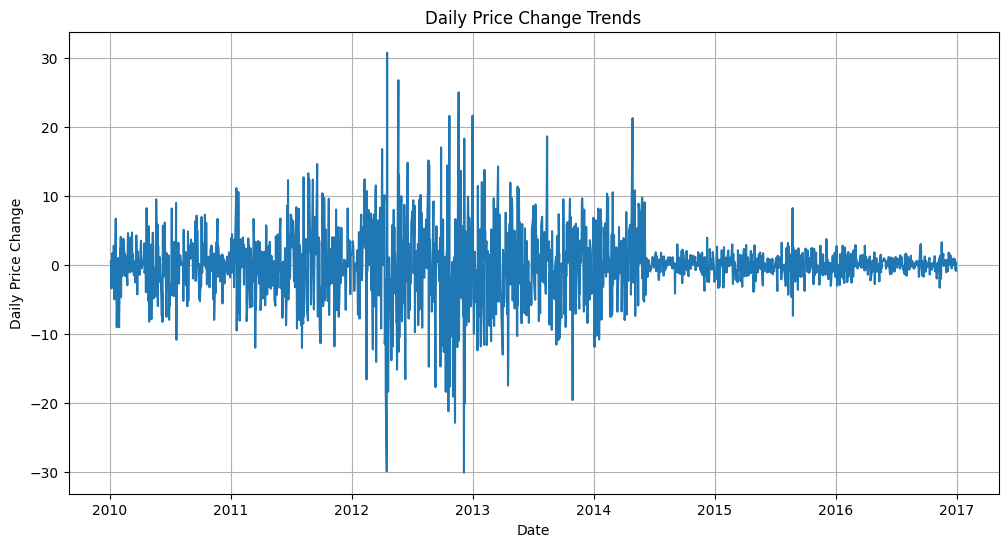

In [13]:
# prompt: Plot the daily price change trends

import pandas as pd
import matplotlib.pyplot as plt

# Assuming daily_price_change_df is your DataFrame with "Date" and "DailyPriceChange" columns

# Convert Spark DataFrame to Pandas DataFrame for easier plotting
pandas_df = daily_price_change_df.toPandas()

# Convert the "Date" column to datetime objects
pandas_df['Date'] = pd.to_datetime(pandas_df['Date'])

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(pandas_df['Date'], pandas_df['DailyPriceChange'])
plt.xlabel('Date')
plt.ylabel('Daily Price Change')
plt.title('Daily Price Change Trends')
plt.grid(True)
plt.show()


In [14]:
# prompt: How would you modify the code to filter data for specific months
# or years

from pyspark.sql.functions import year, month

# Filter data for a specific year (e.g., 2014)
year_2014_df = df.filter(year(df["Date"]) == 2014)
year_2014_df.show()

# Filter data for a specific month (e.g., January)
january_df = df.filter(month(df["Date"]) == 1)
january_df.show()

# Filter data for a specific year and month (e.g., January 2014)
january_2014_df = df.filter((year(df["Date"]) == 2014) & (month(df["Date"]) == 1))
january_2014_df.show()

# You can also use other date-related functions like dayofmonth, dayofweek etc.
# Refer to PySpark documentation for available functions.


+----------+------------------+------------------+------------------+------------------+---------+-----------------+
|      Date|              Open|              High|               Low|             Close|   Volume|        Adj Close|
+----------+------------------+------------------+------------------+------------------+---------+-----------------+
|2014-01-02|        555.680008|        557.029999|        552.020004|         553.12999| 58671200|        74.115916|
|2014-01-03| 552.8600230000001|        553.699989|        540.429993| 540.9800190000001| 98116900|        72.487897|
|2014-01-06|        537.450005|        546.800018|        533.599983|        543.929993|103152700|        72.883175|
|2014-01-07|        544.320015|        545.959999|        537.919975|        540.040024| 79302300|        72.361944|
|2014-01-08|        538.809982| 545.5599900000001|         538.68998|        543.460022| 64632400|        72.820202|
|2014-01-09|        546.800018| 546.8599929999999|        535.34

In [15]:
# prompt: Can you identify the highest daily price increase

from pyspark.sql.functions import max

# Find the highest daily price increase
highest_daily_increase = daily_price_change_df.select(max("DailyPriceChange")).collect()[0][0]

print("Highest Daily Price Increase:", highest_daily_increase)

# Find the date and details corresponding to the highest daily price increase
highest_increase_row = daily_price_change_df.orderBy("DailyPriceChange", ascending=False).first()

if highest_increase_row:
  print("Date of Highest Daily Increase:", highest_increase_row["Date"])
  print("Open Price:", highest_increase_row["Open"])
  print("Close Price:", highest_increase_row["Close"])
  print("Volume:", highest_increase_row["Volume"])


Highest Daily Price Increase: 30.760008999999968
Date of Highest Daily Increase: 2012-04-17
Open Price: 578.93998
Close Price: 609.699989
Volume: 256382000


In [16]:
# prompt: Import SparkSession, functions , IntegerType, DoubleType, matplotlib, seaborn and
# logging

from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import IntegerType, DoubleType
import matplotlib.pyplot as plt
import seaborn as sns
import logging


In [17]:
# prompt: Initialize the Spark session to interact with Spark

# We've already initialized the Spark session in the preceding code.
# If you want to create a new session or restart the current one, use the following:

# from pyspark.sql import SparkSession

# spark = SparkSession.builder.appName("YourAppName").getOrCreate()


In [18]:
# prompt: Load CSV File Using PySpark.

# Assuming the CSV file is named 'your_file.csv' and is in the current directory
df_new = spark.read.csv("/content/ID_31_data.csv", header=True, inferSchema=True)

# Show the first 20 rows of the loaded DataFrame
df_new.show(20)

# Print the schema of the DataFrame to see the data types of each column
df_new.printSchema()


+-------------------+---------+----------+------------------+-------+--------+---+----+--------+--------------+-----------+---------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+-------------+-----------+----------+----+----------+-------------------+-------------------+-------------------+-------+-------+-------+-----------+----------+---------+------------+------------+------------+------------+------------+------------+------------+------------+------------+-------------+---------------+-----------+----------+---------+--------------------+--------+-----------------+
|  capturedtimestamp| latitude| longitude|             speed|geohash|   month|day|hour|      ID|Custom_ID_left|index_right|Custom_ID_right|FIRST_ROUT_1|FIRST_ROAD_1|FIRST_MEDI_1|FIRST_AADT_1|FIRST_NUMB_1| MEAN_AADT_1|MEAN_EXPAN_1|MEAN_PERCE_1|MEAN_MEDIA_1| MEAN_SURFA_1|BUFF_DIST_1|ORIG_FID_1|freq|      date|             Time26|         date_ti

In [19]:
# prompt: Ensure 'speed' is of type Double and 'ID' is Integer

df_new = df_new.withColumn("speed", df_new["speed"].cast(DoubleType())) \
              .withColumn("ID", df_new["ID"].cast(IntegerType()))

df_new.printSchema()


root
 |-- capturedtimestamp: timestamp (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- speed: double (nullable = true)
 |-- geohash: string (nullable = true)
 |-- month: double (nullable = true)
 |-- day: integer (nullable = true)
 |-- hour: integer (nullable = true)
 |-- ID: integer (nullable = true)
 |-- Custom_ID_left: string (nullable = true)
 |-- index_right: integer (nullable = true)
 |-- Custom_ID_right: string (nullable = true)
 |-- FIRST_ROUT_1: string (nullable = true)
 |-- FIRST_ROAD_1: integer (nullable = true)
 |-- FIRST_MEDI_1: integer (nullable = true)
 |-- FIRST_AADT_1: integer (nullable = true)
 |-- FIRST_NUMB_1: integer (nullable = true)
 |-- MEAN_AADT_1: double (nullable = true)
 |-- MEAN_EXPAN_1: double (nullable = true)
 |-- MEAN_PERCE_1: double (nullable = true)
 |-- MEAN_MEDIA_1: double (nullable = true)
 |-- MEAN_SURFA_1: double (nullable = true)
 |-- BUFF_DIST_1: double (nullable = true)
 |-- ORIG_FID_1: i

In [21]:
# prompt: Convert timestamp to Spark timestamp type

from pyspark.sql.functions import to_timestamp

# Assuming your DataFrame has a column named "capturedtimestamp" containing timestamp strings
# Update "capturedtimestamp" with the actual name of your timestamp column
df_new = df_new.withColumn("timestamp_spark", to_timestamp("capturedtimestamp", "yyyy-MM-dd HH:mm:ss"))

# Show the DataFrame with the new Spark timestamp column
df_new.show()


+-------------------+---------+----------+------------------+-------+--------+---+----+----+--------------+-----------+---------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+-------------+-----------+----------+----+----------+-------------------+-------------------+-------------------+-------+-------+-------+-----------+----------+---------+------------+------------+------------+------------+------------+------------+------------+------------+------------+-------------+---------------+-----------+----------+---------+--------------------+--------+-----------------+-------------------+
|  capturedtimestamp| latitude| longitude|             speed|geohash|   month|day|hour|  ID|Custom_ID_left|index_right|Custom_ID_right|FIRST_ROUT_1|FIRST_ROAD_1|FIRST_MEDI_1|FIRST_AADT_1|FIRST_NUMB_1| MEAN_AADT_1|MEAN_EXPAN_1|MEAN_PERCE_1|MEAN_MEDIA_1| MEAN_SURFA_1|BUFF_DIST_1|ORIG_FID_1|freq|      date|             Time26|    

In [22]:
# prompt: Extract hour and day of the week for further analysis

from pyspark.sql.functions import hour, dayofweek

# Extract the hour from the timestamp column
df_new = df_new.withColumn("hour", hour("timestamp_spark"))

# Extract the day of the week (0 = Sunday, 1 = Monday, ..., 6 = Saturday)
df_new = df_new.withColumn("day_of_week", dayofweek("timestamp_spark"))

# Show the DataFrame with the new hour and day_of_week columns
df_new.show()


+-------------------+---------+----------+------------------+-------+--------+---+----+----+--------------+-----------+---------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+-------------+-----------+----------+----+----------+-------------------+-------------------+-------------------+-------+-------+-------+-----------+----------+---------+------------+------------+------------+------------+------------+------------+------------+------------+------------+-------------+---------------+-----------+----------+---------+--------------------+--------+-----------------+-------------------+
|  capturedtimestamp| latitude| longitude|             speed|geohash|   month|day|hour|  ID|Custom_ID_left|index_right|Custom_ID_right|FIRST_ROUT_1|FIRST_ROAD_1|FIRST_MEDI_1|FIRST_AADT_1|FIRST_NUMB_1| MEAN_AADT_1|MEAN_EXPAN_1|MEAN_PERCE_1|MEAN_MEDIA_1| MEAN_SURFA_1|BUFF_DIST_1|ORIG_FID_1|freq|      date|             Time26|    

In [31]:
# prompt: compute the required statistics using PySpark functions (fraction_5_over_limit ,
# fraction_10_over_limit , 100 fraction_20_over_limit)

from pyspark.sql.functions import when, count, sum

# Calculate the required statistics
statistics_df = df_new.agg(
    (sum(when(df_new["speed"] > 5, 1)) / count("*")).alias("fraction_5_over_limit"),
    (sum(when(df_new["speed"] > 10, 1)) / count("*")).alias("fraction_10_over_limit"),
    (sum(when(df_new["speed"] > 20, 1)) / count("*")).alias("fraction_20_over_limit")
)

# Show the calculated statistics
statistics_df.show()


+---------------------+----------------------+----------------------+
|fraction_5_over_limit|fraction_10_over_limit|fraction_20_over_limit|
+---------------------+----------------------+----------------------+
|   0.9795130536814315|    0.9707128190085069|    0.9481959518920504|
+---------------------+----------------------+----------------------+



In [24]:
# prompt: Log the statistics

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Convert the statistics DataFrame to a dictionary
statistics_dict = statistics_df.toPandas().to_dict(orient='records')[0]

# Log the statistics
logger.info("Calculated statistics:")
for key, value in statistics_dict.items():
  logger.info(f"{key}: {value}")


In [33]:
# prompt: Calculate median speed per journey and fractions over limits

from pyspark.sql.functions import percentile_approx, when, count, col

# Assuming 'ID' is the intended column representing journeys
# Replace 'ID' with the actual journey identifier column if different
median_speed_per_journey_df = df_new.groupBy("ID").agg(
    percentile_approx("speed", 0.5).alias("median_speed")
)

# Show the median speed per journey
median_speed_per_journey_df.show()

# Calculate fractions over limits per journey
fractions_over_limits_per_journey_df = df_new.groupBy("ID").agg(
    (sum(when(col("speed") > 5, 1)) / count("*")).alias("fraction_5_over_limit"),
    (sum(when(col("speed") > 10, 1)) / count("*")).alias("fraction_10_over_limit"),
    (sum(when(col("speed") > 20, 1)) / count("*")).alias("fraction_20_over_limit")
)

# Show the fractions over limits per journey
fractions_over_limits_per_journey_df.show()

# You can join these two DataFrames if you need to combine the median speed and fractions in a single DataFrame.

+----+------------+
|  ID|median_speed|
+----+------------+
|NULL|   56.544761|
+----+------------+

+----+---------------------+----------------------+----------------------+
|  ID|fraction_5_over_limit|fraction_10_over_limit|fraction_20_over_limit|
+----+---------------------+----------------------+----------------------+
|NULL|   0.9795130536814315|    0.9707128190085069|    0.9481959518920504|
+----+---------------------+----------------------+----------------------+



In [34]:
# prompt: Print all statistics

# Assuming 'statistics_df' contains the statistics you want to print
statistics_df.show()

# Alternatively, if you want to print each statistic individually:
statistics_dict = statistics_df.toPandas().to_dict(orient='records')[0]
for key, value in statistics_dict.items():
  print(f"{key}: {value}")


+---------------------+----------------------+----------------------+
|fraction_5_over_limit|fraction_10_over_limit|fraction_20_over_limit|
+---------------------+----------------------+----------------------+
|   0.9795130536814315|    0.9707128190085069|    0.9481959518920504|
+---------------------+----------------------+----------------------+

fraction_5_over_limit: 0.9795130536814315
fraction_10_over_limit: 0.9707128190085069
fraction_20_over_limit: 0.9481959518920504


In [35]:
# prompt: Convert to Pandas DataFrame for plotting

# Convert the Spark DataFrame to a Pandas DataFrame
pandas_df = df_new.toPandas()

# Now you can use pandas_df for plotting with matplotlib or seaborn


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


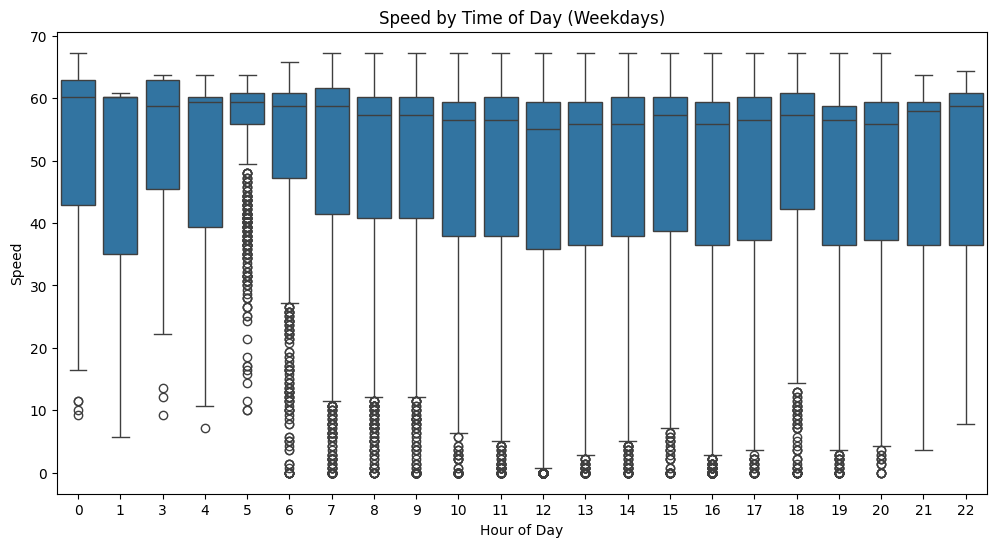

In [36]:
# prompt: Use Boxplots to plot Speed by Time of Day (Weekdays)

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_new has columns 'speed' and 'hour' (extracted from timestamp)
# Filter for weekdays (Monday to Friday, 1 to 5)
weekday_df = df_new.filter((df_new.day_of_week >= 1) & (df_new.day_of_week <= 5))

# Convert the Spark DataFrame to a Pandas DataFrame
pandas_df = weekday_df.toPandas()

# Create a box plot using Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='speed', data=pandas_df)
plt.xlabel('Hour of Day')
plt.ylabel('Speed')
plt.title('Speed by Time of Day (Weekdays)')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


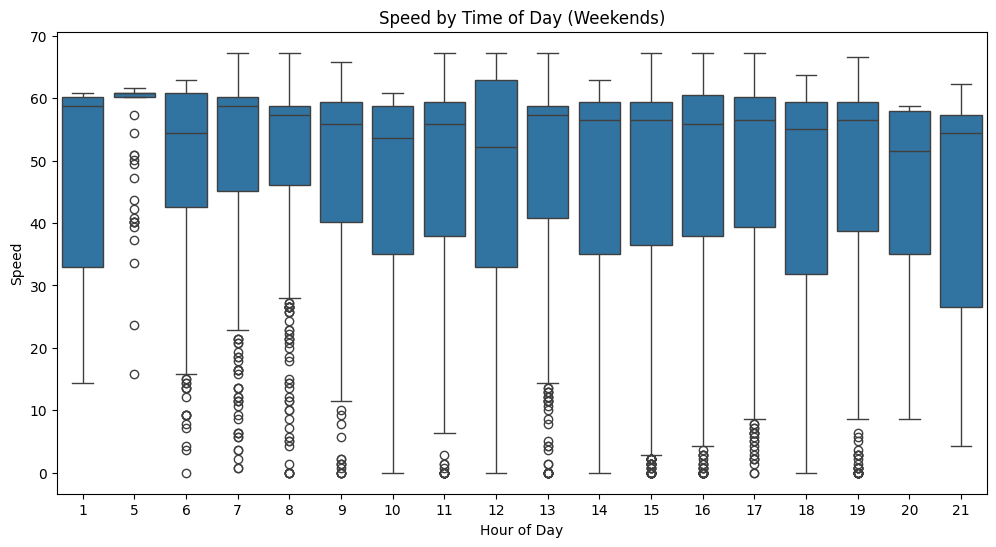

In [37]:
# prompt: Use Boxplots to plot Speed by Time of Day (Weekends)

import matplotlib.pyplot as plt
# Assuming df_new has columns 'speed' and 'hour' (extracted from timestamp)
# Filter for weekends (Saturday and Sunday, 0 and 6)
weekend_df = df_new.filter((df_new.day_of_week == 0) | (df_new.day_of_week == 6))

# Convert the Spark DataFrame to a Pandas DataFrame
pandas_df = weekend_df.toPandas()

# Create a box plot using Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='speed', data=pandas_df)
plt.xlabel('Hour of Day')
plt.ylabel('Speed')
plt.title('Speed by Time of Day (Weekends)')
plt.show()
